# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis
- datetime: (optional)

In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [417]:
from model import MODEL
import utils, plotting, statistics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [519]:
tickers = ['BTC-USD', 'LTC-USD', 'XRP-USD']
#tickers = 'BTC-USD'
model = MODEL(tickers=tickers)

In [520]:
start_date = '2020-01-01'
model.get_data(start=start_date, interval='60m')

[*********************100%***********************]  3 of 3 completed


In [521]:
#edit this:
day_hour = 10
#do not edit below this line:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)
model.data.tail()

[INFO]: filter applied.


BTC-USD    LTC-USD   XRP-USD
Datetime                                                   
2020-04-14 10:00:00+01:00  6839.287109  40.878658  0.185913
2020-04-15 10:00:00+01:00  6855.382324  41.248444  0.187341
2020-04-16 10:00:00+01:00  7023.486328  42.673874  0.189330
2020-04-17 10:00:00+01:00  7101.330566  42.428711  0.189191
2020-04-18 10:00:00+01:00  7146.192383  42.837894  0.191020

In [522]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                   ticker = ['BTC-USD', 'LTC-USD', 'XRP-USD']                   |
|                             start date = 01/01/20                              |
|                              end date = 04/18/20                               |
|                      initial investment per ticker = 200                       |
[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************
[TICKER]: BTC-USD
[INFO]: No tax paid.
------------------------------------------------------

In [523]:
model.data

BTC-USD    LTC-USD   XRP-USD
Datetime                                                   
2020-01-01 10:00:00+00:00  7204.458008  41.991032  0.193965
2020-01-02 10:00:00+00:00  7172.155273  41.560825  0.192168
2020-01-03 10:00:00+00:00  7322.000000  41.713490  0.192885
2020-01-04 10:00:00+00:00  7367.364258  42.902470  0.193033
2020-01-05 10:00:00+00:00  7463.829102  43.119247  0.194590
...                                ...        ...       ...
2020-04-14 10:00:00+01:00  6839.287109  40.878658  0.185913
2020-04-15 10:00:00+01:00  6855.382324  41.248444  0.187341
2020-04-16 10:00:00+01:00  7023.486328  42.673874  0.189330
2020-04-17 10:00:00+01:00  7101.330566  42.428711  0.189191
2020-04-18 10:00:00+01:00  7146.192383  42.837894  0.191020

[109 rows x 3 columns]

In [524]:
model.ticker_df['BTC-USD']

Buy Dates          Sell Dates   Buy Prices   Sell Prices  \
0  2020-01-10 10:00:00 2020-01-12 10:00:00  7795.303217   8111.718249   
1  2020-01-13 10:00:00 2020-01-15 10:00:00  8165.026612   8723.308437   
2  2020-01-21 10:00:00 2020-01-22 10:00:00  8690.157882   8634.341646   
3  2020-01-24 10:00:00 2020-01-29 10:00:00  8295.156315   9355.800567   
4  2020-02-04 10:00:00 2020-02-07 10:00:00  9208.892237   9751.618849   
5  2020-02-08 10:00:00 2020-02-09 10:00:00  9819.497716  10041.326909   
6  2020-02-11 10:00:00 2020-02-13 10:00:00  9819.107917  10118.744532   
7  2020-02-17 10:00:00 2020-02-19 10:00:00  9767.435061  10074.506585   
8  2020-02-21 10:00:00 2020-02-24 10:00:00  9704.414941   9712.027397   
9  2020-02-28 10:00:00 2020-03-06 10:00:00  8620.244783   9109.852196   
10 2020-03-10 10:00:00 2020-03-11 10:00:00  8048.154973   7792.497649   
11 2020-03-13 10:00:00 2020-03-20 10:00:00  5652.817937   6801.950224   
12 2020-03-23 10:00:00 2020-03-25 10:00:00  5867.735294   6587.066304   
13 2020-03-29 09:00:00 2020-04-03 09:00:00  6149.887106   6919.031232   
14 2020-04-05 09:00:00 2020-04-07 09:00:00  6803.237280   7342.665793   
15 2020-04-11 09:00:00 2020-04-18 09:00:00  6876.204621   7113.319898   

    Trade Reward  Trade Win  Trade Efficiency  
0     208.118094   8.118094          0.040590  
1     222.348121  14.230027          0.068375  
2     220.919996  -1.428125         -0.006423  
3     249.167507  28.247512          0.127863  
4     263.852209  14.684702          0.058935  
5     269.812812   5.960602          0.022591  
6     278.046329   8.233518          0.030516  
7     286.787632   8.741303          0.031438  
8     287.012598   0.224965          0.000784  
9     303.314165  16.301567          0.056797  
10    293.679101  -9.635064         -0.031766  
11    353.379615  59.700514          0.203285  
12    396.700743  43.321129          0.122591  
13    446.314670  49.613927          0.125066  
14    481.702949  35.388279          0.079290  
15    498.313730  16.610781          0.034483

[INFO]: New sell signal was detected for last value: 7146.1923828125.


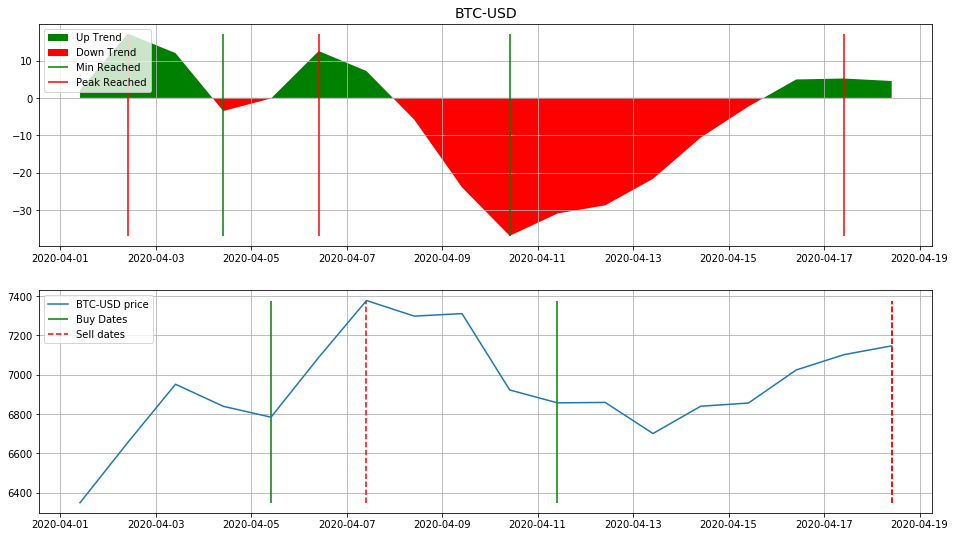

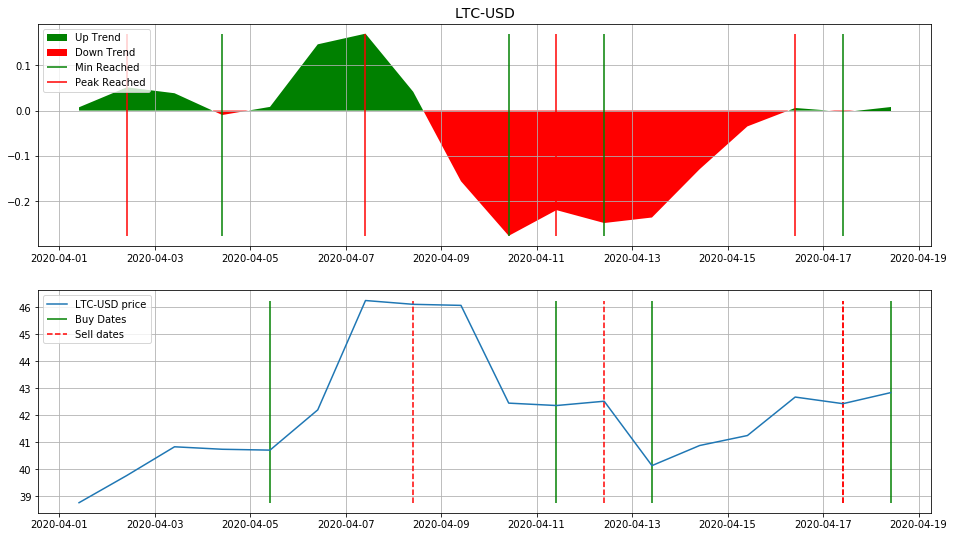

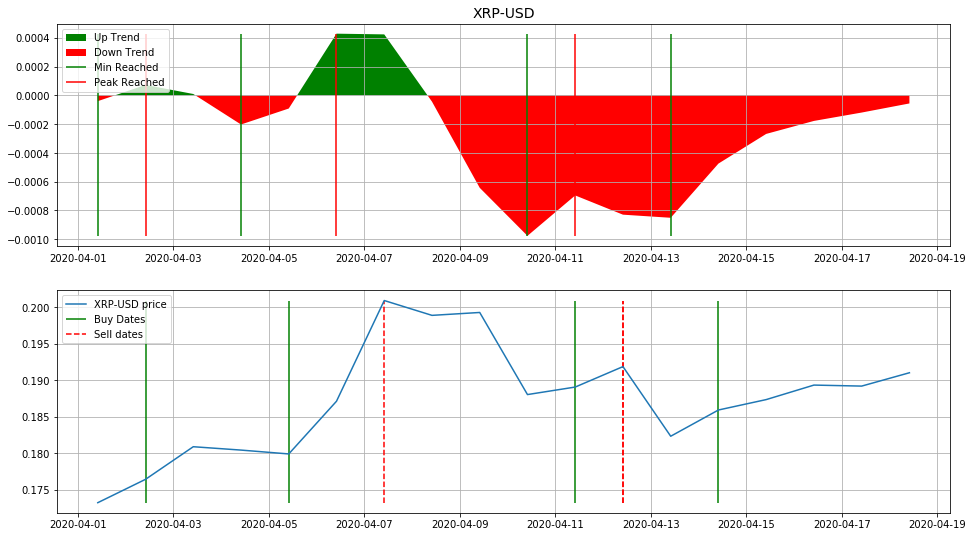

[*********************100%***********************]  3 of 3 completed

In [525]:
plotting.plot_model(model, tickers='all', plot_from_date='2020-04-01')

In [526]:
imag_model = model.copy_model()

In [527]:
imag_model.append_timedelta(timedelta=1)

[USER INPUT]: Overwrite existing data? y


In [528]:
imag_model.data

BTC-USD    LTC-USD   XRP-USD
2020-01-01 10:00:00+00:00  7204.458008  41.991032  0.193965
2020-01-02 10:00:00+00:00  7172.155273  41.560825  0.192168
2020-01-03 10:00:00+00:00  7322.000000  41.713490  0.192885
2020-01-04 10:00:00+00:00  7367.364258  42.902470  0.193033
2020-01-05 10:00:00+00:00  7463.829102  43.119247  0.194590
...                                ...        ...       ...
2020-04-15 10:00:00+01:00  6855.382324  41.248444  0.187341
2020-04-16 10:00:00+01:00  7023.486328  42.673874  0.189330
2020-04-17 10:00:00+01:00  7101.330566  42.428711  0.189191
2020-04-18 10:00:00+01:00  7146.192383  42.837894  0.191020
2020-04-19 10:00:00+01:00          NaN        NaN       NaN

[110 rows x 3 columns]

In [529]:
imag_model.comp_break_values()

[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Current ticker: LTC-USD
[INFO]: Current ticker: XRP-USD
[USER INPUT]: Append breaking values w.r.t smallest tolerances? n
[INFO]: Current values: {'BTC-USD': 7146.1923828125, 'LTC-USD': 42.837894439697266, 'XRP-USD': 0.19102045893669128}
[INFO]: Break values: {'BTC-USD': [7210.508114257355, 7231.946691405788], 'LTC-USD': [43.07778664855704, 42.77792138747922], 'XRP-USD': [0.1916317244052938, 0.18964511163235204]}
[INFO]: Tolerances: {'BTC-USD': array([64.31573144, 85.75430859]), 'LTC-USD': array([ 0.23989221, -0.05997305]), 'XRP-USD': array([ 0.00061127, -0.00137535])}


In [530]:
imag_model._init_model()
imag_model.data.tail(1)

[INIT]: Initialising model for tickers: ['BTC-USD', 'LTC-USD', 'XRP-USD']
[WARNING]: Ignoring second entry of gradient!
[INIT]: Successfully initialized model.
**********************************************************************************


BTC-USD  LTC-USD  XRP-USD
2020-04-19 10:00:00+01:00      NaN      NaN      NaN

[INFO]: Current ticker: BTC-USD
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
[INFO]: New sell signal was detected for last value: 7120.376762829139.
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
[INFO]: Current ticker: LTC-USD
----------------------------------------------------------------------------------
----------------------------------

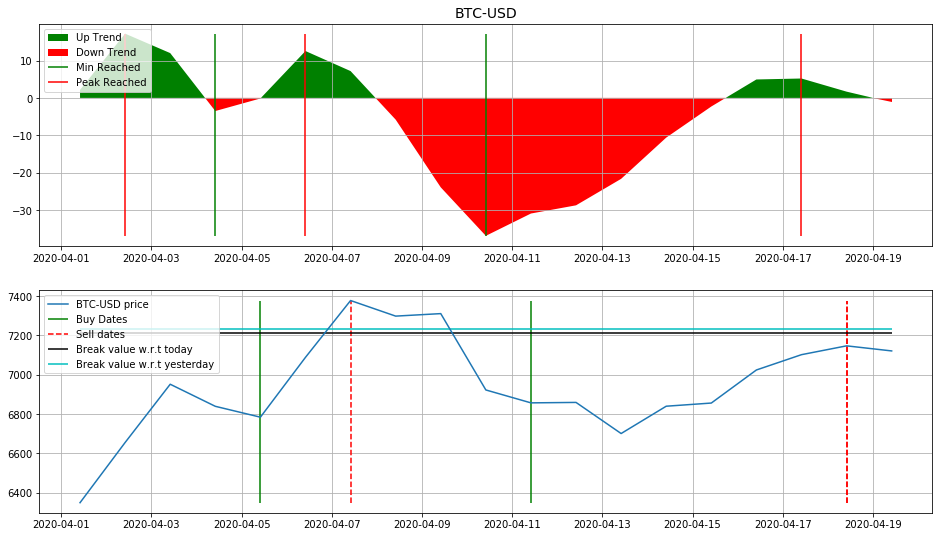

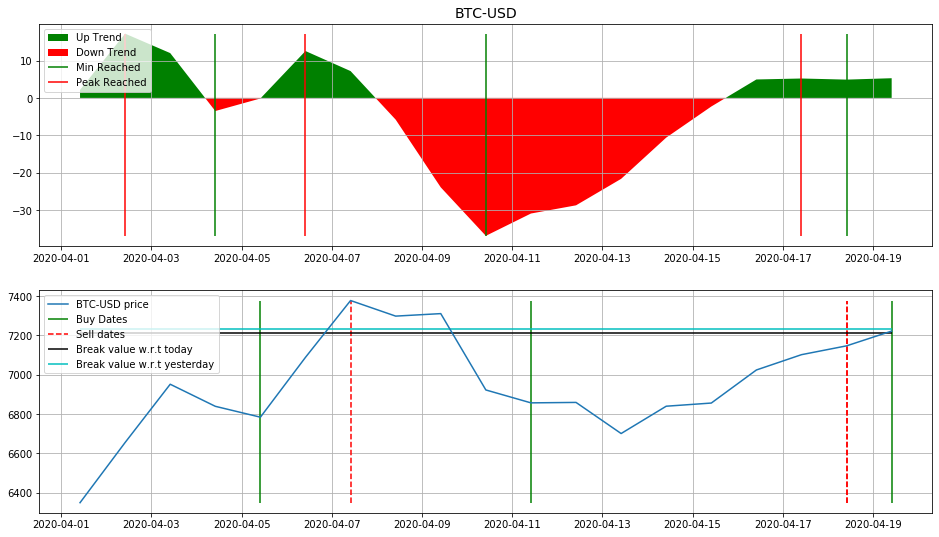

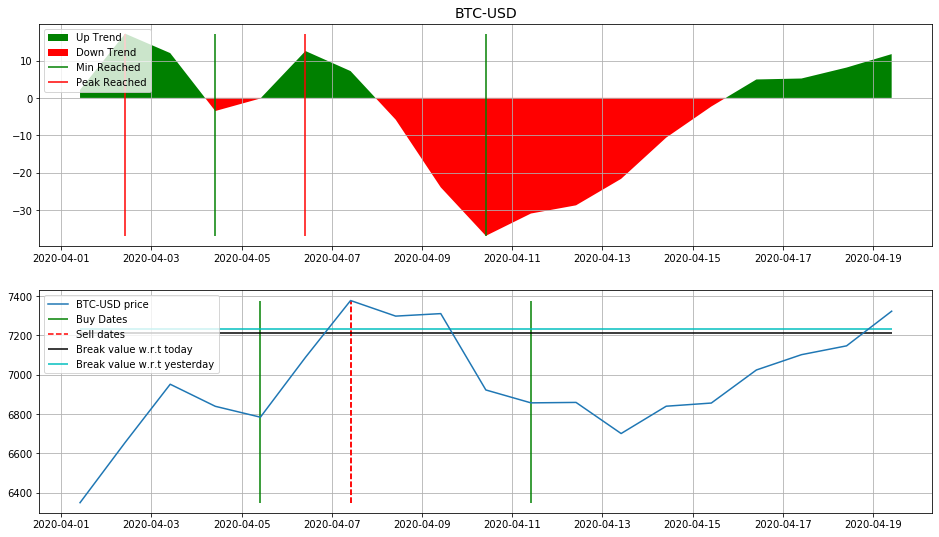

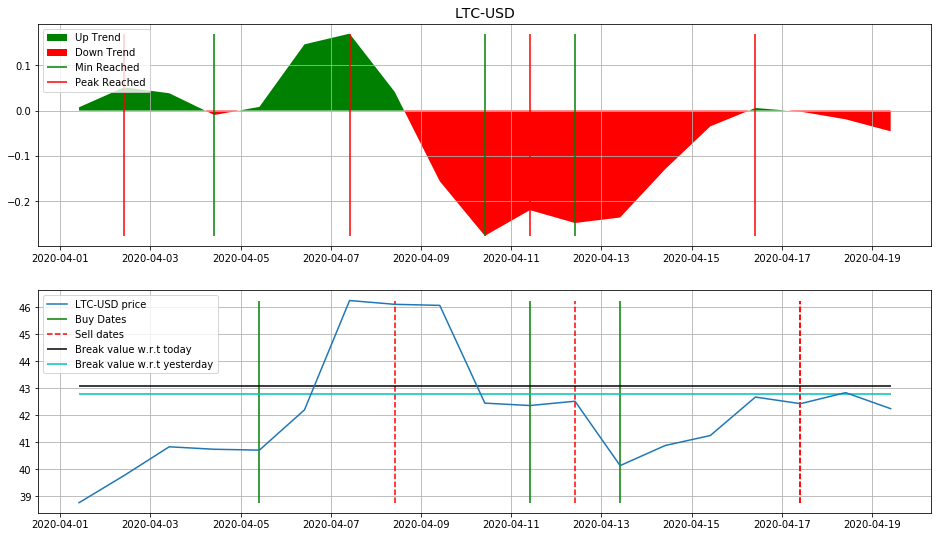

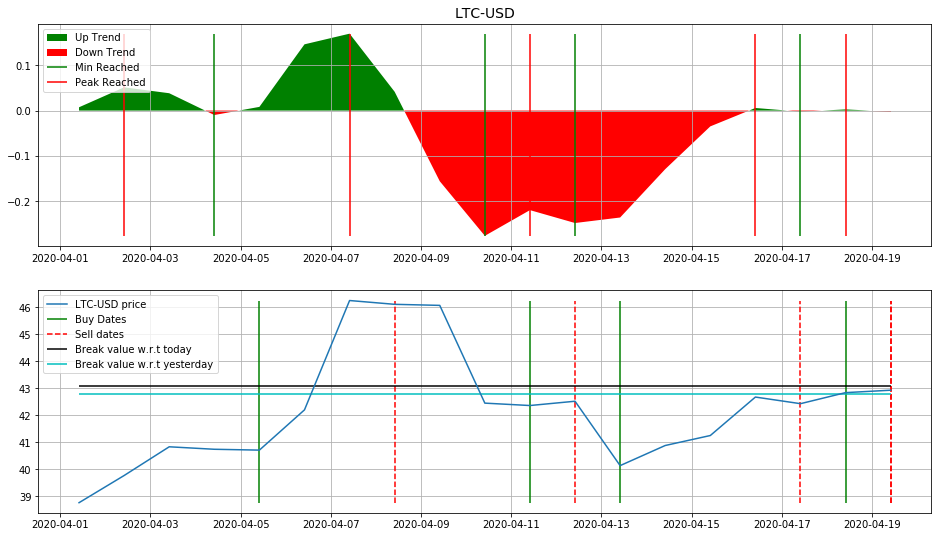

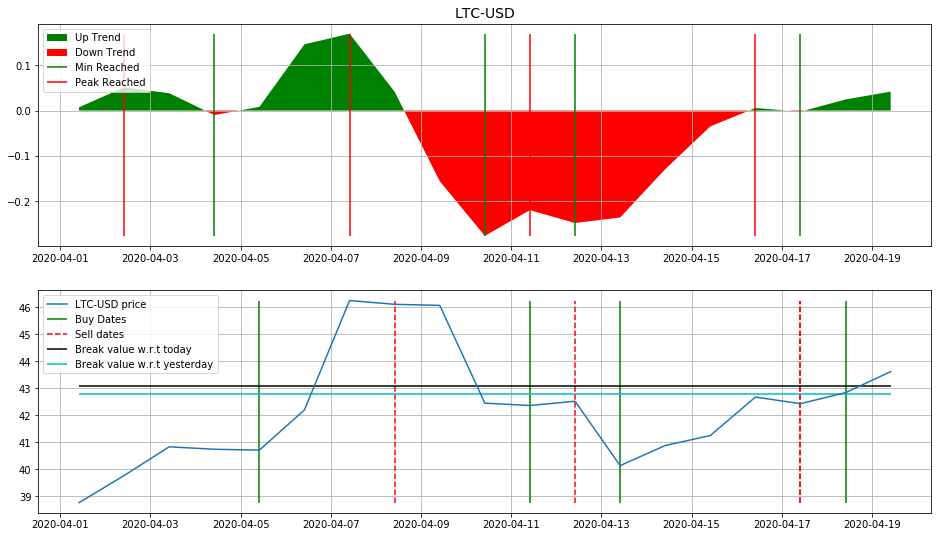

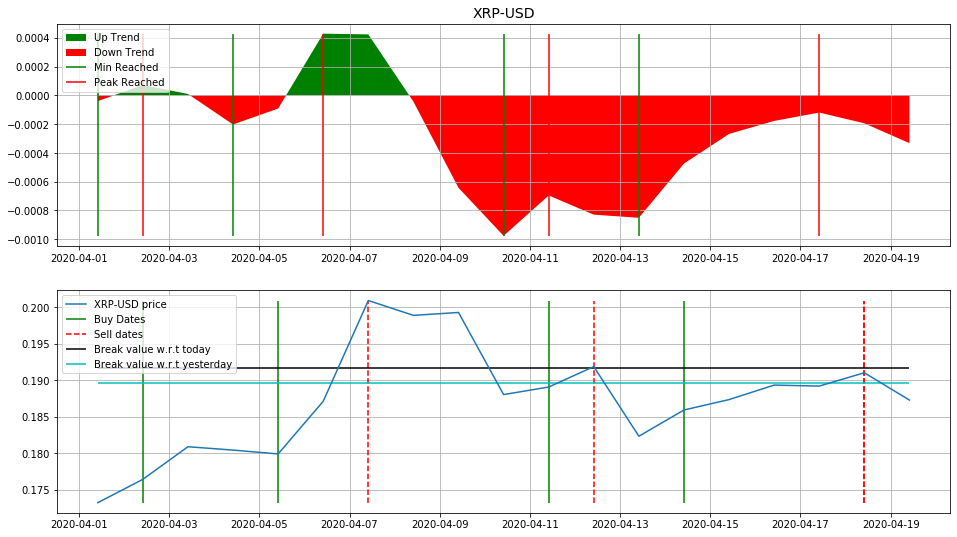

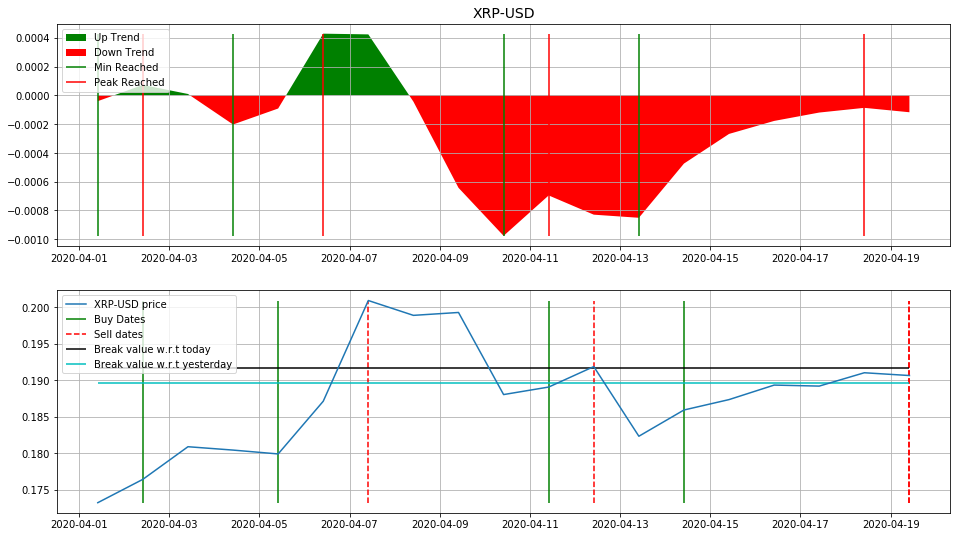

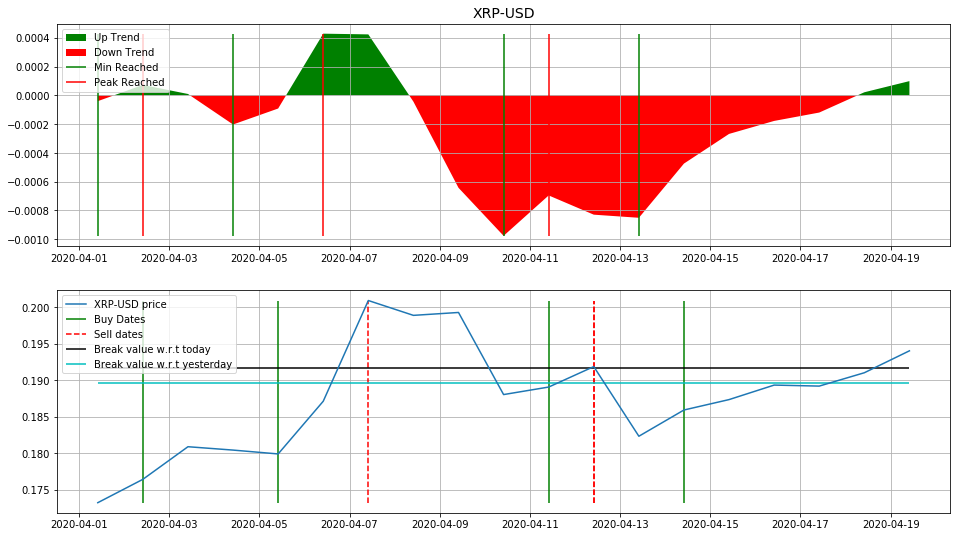

In [531]:
imag_model.show_possibilities(plot_from_date='2020-04-01')

In [486]:
#stats_data = utils.download_data(tickers='BTC-USD', start='2019-01-01', interval='60m')

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[INFO]: Current value: 7243.974609375!
[INFO]: New tolerances: [-33.46649512 -12.02791797]!
Probability for reaching smallest tolerance: 56.66955449525436%
Probability for reaching highest tolerance: 52.68665672648185%
Probability between: 3.98289776877251%
[INFO]: Current ticker: LTC-USD
[*********************100%***********************]  1 of 1 completed
[INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[INFO]: Current value: 43.82804489135742!
[INFO]: New tolerances: [-0.75025824 -1.0501235 ]!
Probability for reaching smallest tolerance: 66.61016422340948%
Probability for reaching highest tolerance: 62.158739608156424%
Probability between: 4.45142461525306%
[INFO]: Current ticker: XRP-USD
[*********************100%**************

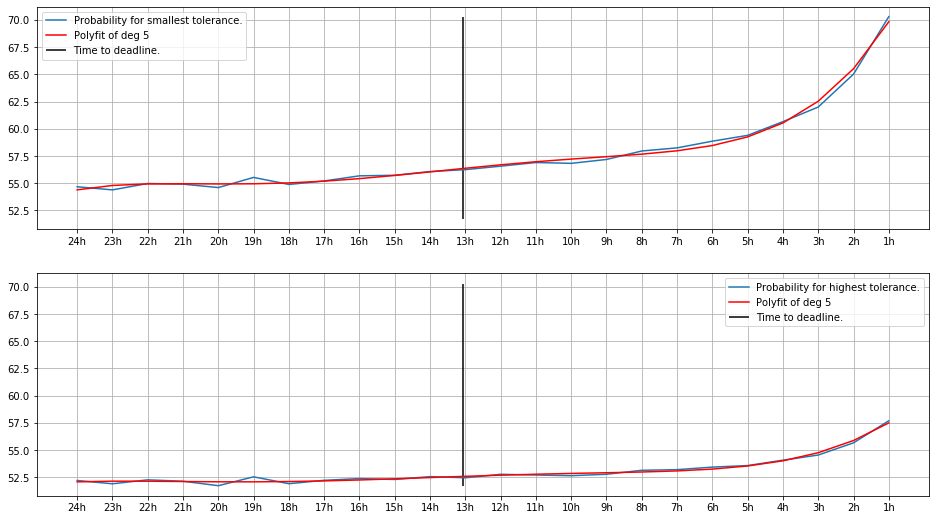

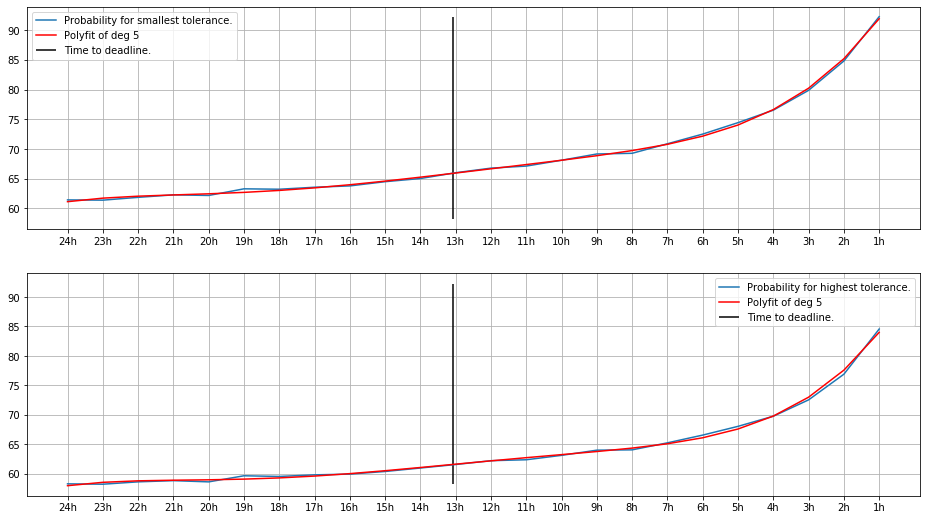

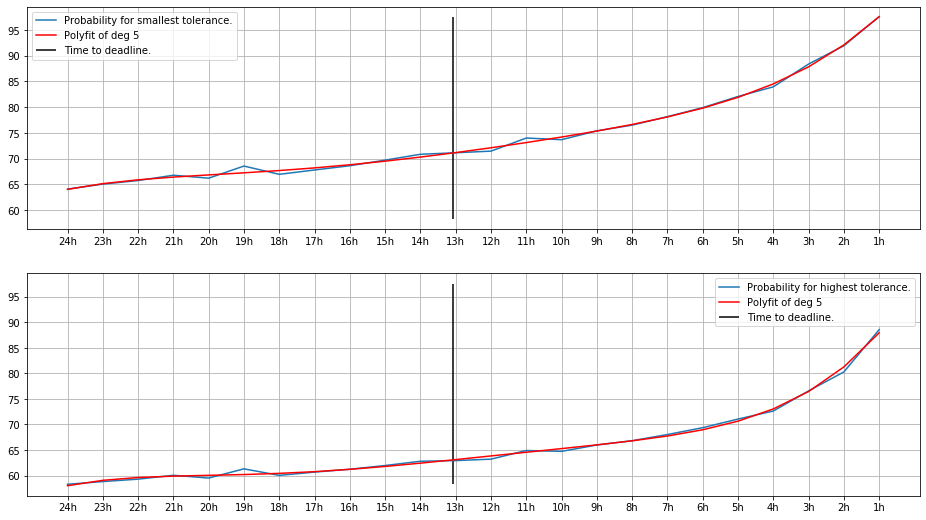

In [532]:
statistics.calc_probs(model=imag_model, stats_data=None, auto_update_tolerances=True)

In [133]:
#TODO: Implement this: 
#from model import STATISTICAL_MODEL
#stat_model = STATISTICAL_MODEL(imag_model)